<a href="https://colab.research.google.com/github/RadhikaRM/Playstore-Data-Analysis/blob/main/PlayStore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**
## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b> 

Google Play Store is a major app distribution platform for Android users.There are thousands of applications for various purposes available here.As a result,the competition in the app market is quite fierce.To carve their niche in this market,companies should go about it very strategically.App developers would benefit greatly from knowing what works and what does not work on Playstore.

> ***There comes data to our rescue!***

We can make use of historical data of Apps in Playstore.The Playstore apps data available to us contain details regarding the category,rating,size and several other factors about the apps.We also have another dataset containing the customer reviews of Android apps.
By performing Exploratory Data Analysis on these datasets,we can figure out the key factors responsible for App Engagement  and Success.

So,let's get started!


First,we import the libraries and modules which we have to use in this analysis.

## **Importing the required libraries**

In [1]:
#importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



## **Bringing in the data**


In [2]:
#mounting the drive containing the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the playstore data and user reviews data
PS_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ PlayStore_Data.csv')
UR_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ User_Reviews.csv')


---
## **Data cleaning and preparation** 


***“No data is clean, but most is useful.***”~ Dean Abbott

An important part of the data analysis process is Data Cleaning.  Only when the data has been cleaned can it be analysed and transformed into something beneficial.



>## ***Playstore data***


In [4]:
#To display the first 3 observations of the data 
PS_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
#To display the last 5 observations of the data 
PS_df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### **Data Description of Playstore dataframe**

The **PS_df** contains **10841** rows and **13** columns in total.
The columns present in the Play Store dataframe are:

1.   **App :** Name of the application
2.  **Category**: Category in which the app belongs
3.   **Rating**: Rating given by users to the particular app
4.  **Reviews**: The number of reviews received by the app
5.  **Size**: The amount of space required for app installation
5.  **Installs**: The number of installations of the app 
6.   **Type**: The type of the app ,whether its free or paid
7.   **Price**: The price of the app
8.   **Content rating**:The targeted audience of the app
9.   **Genres**: The genre of content offered by the app
10.  **Last updated**:The date on which the app was last updated
11.  **Current Ver**:The current version of the app
12.  **Android Ver**: The Andriod version(s) supported by the app


In [6]:
def dataframe_info(df):
  ''' 
  Returns a dataframe displaying the column datatypes,
  count of unique values and count & percent of missing values in the dataframe
  '''
  info_df=df.isnull().sum().reset_index()
  info_df.rename(columns={'index':'Column_name',0:'Count_of_missing_values'},inplace=True)
  info_df['% of  NaN']=round((info_df['Count_of_missing_values']/len(df))*100,2)
  info_df['dtype']=df.dtypes.values
  info_df['Count_of_unique_values']=df.nunique(axis=0).values
  return(info_df)

In [7]:
#To understand the datatypes of features in playstore data and to determine the count of missing values
dataframe_info(PS_df)

,Column_name,Count_of_missing_values,% of NaN,dtype,Count_of_unique_values
0,App,0,0.00,object,9660
1,Category,0,0.00,object,34
2,Rating,1474,13.60,float64,40
3,Reviews,0,0.00,object,6002
4,Size,0,0.00,object,462
5,Installs,0,0.00,object,22
6,Type,1,0.01,object,3
7,Price,0,0.00,object,93
8,Content Rating,1,0.01,object,6
9,Genres,0,0.00,object,120


* It is evident that the dataset contains several null values.
* The datatypes of columns such as Size,Installs,Rating,Price,Content Rating are incorrect

In [8]:
#displaying the unique values of some columns in PS_df
for col in PS_df.columns:
  if PS_df[col].nunique()<500:
    print(f"The unique values in {col} column are :")
    print(PS_df[col].unique())
    print('\n')

The unique values in Category column are :
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


The unique values in Rating column are :
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]


The unique values in Size column are :
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Va

Besides null values,the data could also  contain  duplicate values, values with incorrect datatypes and formats,irrelevant columns and outliers . It is important to replace/remove these values before proceeding with the analysis. So let's get to work and treat them right!

**1.Dropping Duplicate rows**

In [9]:
#finding the number of duplicates in 'App' column
PS_df.duplicated(['App']).value_counts()

False    9660
True     1181
dtype: int64

In [10]:
# Updates the playstore dataframe with duplicate rows removed
PS_df.sort_values(["App","Reviews"],inplace=True)
PS_df.drop_duplicates("App","last",inplace=True)
PS_df.reset_index(drop=True,inplace=True)

**2.Handling missing or NaN values**

>**2.1. Treating null value in 'Type' column**

In [11]:
#identifying the app with type NaN
PS_df[PS_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2641,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


After cross-checking in the Google Playstore,I have identified that this app belongs to the Type 'Free'

In [12]:
#Filling the type of the app as Free
PS_df['Type'].fillna("Free", inplace = True)

>**2.2. Treating null value in 'Content Rating' column**


In [13]:
#identifying the app with Content Rating NaN
PS_df[PS_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5806,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The value of category  and genres column is missing in this row .This app belongs to 'LIFESTYLE' category and the same genre. 

In [14]:
#Filling in the values for Category and Genres
PS_df.loc[5806, :] = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE',1.9, 19.0, '3.0M',
       '1,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018',
       '1.0.19', '4.0 and up']
PS_df.loc[5806, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                          Lifestyle
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 5806, dtype: object

>**2.3. Treating the null values in 'Rating' column**


As seen earlier,The 'Rating' column has 1474 null values which accounts to a significant amount of data .So,dropping rows containing null values of Rating can drastically affect our analysis.So, it is wise to better to replace the null values with the median value of Rating.

In [15]:
#taking median value of the rating column and replace NaN values in it with it
rating_median = PS_df['Rating'].median()

In [16]:
#Replacing the NaN values of  "Rating" with the median value
PS_df['Rating'].fillna(value=rating_median, inplace = True)

>**2.4. Dropping the null values in 'Android Ver'  and 'Current Ver' columns**

In [17]:
#dropping null values in 'Android Ver' and 'Current Ver' columns
PS_df = PS_df.dropna(subset= ["Current Ver","Android Ver"],how = "any")

In [ ]:
#check if the playstore dataframe has any null values to ensure that all modifications are in place
PS_df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Perfect!No more null values

**3. Correcting data types**

Reviews, Size, Installs, and Price should have numeric datatypes, but we find object type here, therefore let's convert them to their respective data types.


>  **3.1. Correcting datatype of 'Reviews' column**

In [18]:
#Changing datatype for "Reviews" column
PS_df['Reviews'] = PS_df['Reviews'].astype(float)


>  **3.2. Correcting datatype of 'Size' column**

In [19]:
#the count of number of apps with the same size 
PS_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
914k                     1
353k                     1
784k                     1
951k                     1
549k                     1
Name: Size, Length: 457, dtype: int64

In [20]:
# Replacing/removing the string characters in  "Size" column

PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace(',', ''))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('M', 'e+6'))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('k', 'e+3'))

#For the time being,replacing 'Varies with device' with Nan 
PS_df['Size'] = PS_df.Size.replace('Varies with device', np.NaN)

In [21]:
#Changing datatype for "Size" column
PS_df['Size']= PS_df['Size'].apply(pd.to_numeric)

In [22]:
#Converting the value in bytes to megabytes for easier interpretation
PS_df['Size']=PS_df['Size']/(10**6) 

In [23]:
#determining the mean,median of Apps sizes excluding the apps with Nan values
PS_df[PS_df['Size']!=np.nan]['Size'].describe()

count    8423.000000
mean       20.409646
std        21.830924
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

Majority of the apps have size that 'Varies with device'.Keeping those apps aside,we see that  minimum size of apps in the dataset is 8.5KB and the maximum size is 100 MB.It looks like most of the apps in playstore are sized under 28 MB which is why we get median of 12MB and mean of 20MB.


> **3.3. Correcting datatype of 'Installs' column**

In [24]:
#Displaying the unqiue values in Installs column
PS_df['Installs'].unique()

array(['500+', '1,000,000+', '10,000+', '100+', '100,000+', '500,000+',
       '10,000,000+', '5,000+', '50,000+', '5+', '1,000+', '10+',
       '50,000,000+', '100,000,000+', '5,000,000+', '50+', '0+', '1+',
       '500,000,000+', '0', '1,000,000,000+'], dtype=object)

In [25]:
# Replacing/removing the string characters in "Installs" column
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.strip('+'))
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.replace(',',''))

#Changing datatype for "Installs" column
PS_df['Installs']=PS_df['Installs'].astype(int)

In [26]:
# #The counts of apps with same number of installations
# PS_df['Installs'].value_counts()

Looks like most number of apps have 1 Million installs.There are 20 apps with 100 million downloads .

In [27]:
PS_df['Installs'].describe()

count    9.650000e+03
mean     7.787301e+06
std      5.378459e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

About 75% of apps in Playstore have installations under 1 Million.The maximum number of downloads for an app/apps is 100 Million.There are also quite a few apps which have been not installed at all.


> **3.4. Correcting datatype of 'Price' column**

In [28]:
# Replacing/removing the string characters in "Price" column
PS_df['Price']=PS_df['Price'].apply(lambda x: x.replace('$',''))

#Changing datatype for "Price" column
PS_df['Price']=PS_df['Price'].astype(float)

> **3.5.  Correcting datatype of 'Last updated' column and extracting two new columns**

In [29]:
#Changing the datatype of column "Last updated" and extracting year and month of last update 
PS_df['Last Updated']=PS_df['Last Updated'].apply(lambda x : datetime.strptime(x,"%B %d, %Y"))


 **4. Sanity checks**

In [30]:
PS_df[PS_df['Reviews']>PS_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
434,AX Watch for WatchMaker,PERSONALIZATION,4.3,2.0,0.238,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up
629,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,NaN,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
1765,Brick Breaker BR,GAME,5.0,7.0,19.000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
2970,DN Blog,SOCIAL,5.0,20.0,4.200,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
3151,DZ Puzzle,FAMILY,4.3,14.0,47.000,10,Paid,0.99,Everyone,Puzzle,2017-04-22,1.2,2.3 and up
5532,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25.000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
6349,Mu.F.O.,GAME,5.0,2.0,16.000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up
7301,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4.0,64.000,1,Free,0.00,Everyone,Education,2018-07-17,1.0.1,4.4 and up
7314,Ra Ga Ba,GAME,5.0,2.0,20.000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
7643,Sam.BN Pro,TOOLS,4.3,11.0,2.000,10,Paid,0.99,Everyone,Tools,2015-03-27,1.0.0,4.0.3 and up


Reviews given without even Installing the apps makes no sense.So let's remove these entries.



In [31]:
PS_df.drop(PS_df[PS_df['Reviews']>PS_df['Installs']].index , inplace=True)

In [32]:
#Statistical summary of numerical columns
PS_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9639,9639,9639.000000,9.639000e+03,8413.000000,9.639000e+03,9639,9639.000000,9639,9639,9639,9639,9639
unique,9639,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1376,2817,33
top,"""i DT"" Fútbol. Todos Somos Técnicos.",FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03 00:00:00,Varies with device,4.1 and up
freq,1,1875,NaN,NaN,NaN,NaN,8892,NaN,7884,824,252,1054,2202
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN,NaN
mean,NaN,NaN,4.191493,2.170357e+05,20.409713,7.796186e+06,NaN,1.100396,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.496792,1.833271e+06,21.833382,5.381463e+07,NaN,16.869580,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.008500,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,4.600000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN




The Cleaned Playstore dataset has 9638 entries.Now let's move on to the User Review dataset.

###**Creating new columns**

In [33]:
# segment and sort the numeric data values in Size column into bins
#Creating Size_groups
def size_group(app_size):
  '''
  This function is used to segment and sort numeric data values in Size column into groups
  '''
  if app_size<1:
    return('<1MB')
  elif app_size>1 and app_size<=20:
    return('1MB-20MB') 
  elif app_size>20 and app_size<=40:
    return('20MB-40MB')
  elif app_size>40 and app_size<=60:
    return('40MB-60MB')
  elif app_size>60 and app_size<=80:
    return('60MB-80MB')
  elif app_size>80 and app_size<=100:
    return('80MB-100MB')
  else:
    return('Varies with device')  

In [34]:
#Creating size group from 'Size' column
PS_df['Size_group']=PS_df['Size'].apply(lambda x:size_group(x))

In [35]:
#Extracting year and month from 'Last Updated' column
PS_df['Last_update_year']=PS_df['Last Updated'].apply(lambda x :x.year)
PS_df['Last_update_month']=PS_df['Last Updated'].apply(lambda x :x.month)

In [36]:
#Log transformed Installs
PS_df['log_installs']=PS_df['Installs'].transform(lambda x: np.log1p(x))
PS_df['log_installs'].describe()

count    9639.000000
mean       10.710118
std         4.366511
min         0.000000
25%         6.908755
50%        11.512935
75%        13.815512
max        20.723266
Name: log_installs, dtype: float64

# **Dropping unwanted columns**

In [37]:
#Retaining the the key genre values in 'Genres' column 
PS_df['Genres']=PS_df['Genres'].apply(lambda x: x.split(';')[0])
#displaying the unique values in 'Genres' column
PS_df['Genres'].unique()

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational', 'Casino', 'Card', 'Auto & Vehicles', 'Weather',
       'Beauty', 'Strategy', 'Music', 'Libraries & Demo', 'Role Playing',
       'Trivia', 'Parenting', 'Word', 'Music & Audio'], dtype=object)

In [38]:
#displaying the unique values in 'Category' column
PS_df['Category'].unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING'], dtype=object)

The elements in Category and Genres are  mostly the same.Therefore, dropping the Genres column.


In [39]:
#Dropping unwanted columns
PS_df.drop(columns=['Genres','Current Ver','Last Updated','Size'],axis=1,inplace=True)



> ## ***User review data***


In [40]:
#To display first 5 observations of User Review dataframe
UR_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [41]:
#To display last 5 observations of User Review dataframe
UR_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **Data Description of User Reviews dataframe**

The User Review dataframe contains the following information:

1.  **App:** Name of the application.
2.   **Translated_Review:** The review given by the user, translated to English.
3.   **Sentiment:** The nature of the review,whether it is positive or negative.
4.   **Sentiment_Polarity:** numerical value given to the sentiment of the user by analyzing the translated review.Its value ranges from[-1,1].A review which has  sentiment polarity in the range of [-1,0) can be considered to have negative sentiment.A value of 0 corresponds to a neutral sentiment and values ranging from (0,1] indicates that the review has a positive sentiment.

5.   **Sentiment_Subjectivity:** quantifies the amount of personal opinion and factual information contained in the translated reviews.Its value ranges from [0,1].A value of 0 indicates that the review is purely objective(fact) and a value of 1 implies that the review is purely subjective(opinion).



In [42]:
#To understand the datatypes of features in UR_df and to determine the count of missing values
dataframe_info(UR_df)

,Column_name,Count_of_missing_values,% of NaN,dtype,Count_of_unique_values
0,App,0,0.00,object,1074
1,Translated_Review,26868,41.79,object,27994
2,Sentiment,26863,41.78,object,3
3,Sentiment_Polarity,26863,41.78,float64,5410
4,Sentiment_Subjectivity,26863,41.78,float64,4474


 **1.Dealing with duplicate rows**

In [43]:
#Checking for the presence of entries which are entirely duplicated
UR_df.duplicated( ).value_counts()

True     33616
False    30679
dtype: int64

The reviews in the Translated_Review column need not be unique.The translated version of people's opinions for the apps could be similar.So we are not dropping the duplicate rows

In [44]:
UR_df[UR_df.duplicated()].head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


**2.Handling missing values**

In [45]:
#checking for null values
UR_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [46]:
pd.concat([UR_df[UR_df['Translated_Review'].isnull()].head(5),UR_df[UR_df['Translated_Review'].isnull()].tail(5)])

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


These entries do not contain any textual information in the Translated_review column and so,they are not helpful to us.So it's better to drop these rows.

In [47]:
#Eliminating the existing null value(s) from Translated_Review
UR_df.dropna(subset = ['Translated_Review'], inplace=True)

In [48]:
#Checking for null values in Sentiment,Sentiment_Polarity,Sentiment_Subjectivity columns
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


All the null values have been eliminated

**3.Sanity checks**

In [49]:
#inspecting the elements in the Sentiment column
set(UR_df['Sentiment'])

{'Negative', 'Neutral', 'Positive'}

Let's check if range of values in Sentiment_Polarity column matches with the Sentiment of the review

In [50]:
for sentiment in UR_df['Sentiment'].unique():
  print(f'The value distribution of Sentiment Polarity of {sentiment} reviews')
  print(UR_df[UR_df['Sentiment']==sentiment]['Sentiment_Polarity'].describe())
  print('\n')

The value distribution of Sentiment Polarity of Positive reviews
count    2.399800e+04
mean     3.724021e-01
std      2.526559e-01
min      5.551115e-18
25%      1.666667e-01
50%      3.300000e-01
75%      5.000000e-01
max      1.000000e+00
Name: Sentiment_Polarity, dtype: float64


The value distribution of Sentiment Polarity of Neutral reviews
count    5158.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Sentiment_Polarity, dtype: float64


The value distribution of Sentiment Polarity of Negative reviews
count    8.271000e+03
mean    -2.561728e-01
std      2.354828e-01
min     -1.000000e+00
25%     -3.645833e-01
50%     -1.833333e-01
75%     -8.125000e-02
max     -2.523234e-18
Name: Sentiment_Polarity, dtype: float64




In [51]:
#inspecting elements in the Sentiment_Polarity column
UR_df[(UR_df['Sentiment_Polarity']>1) | (UR_df['Sentiment_Polarity']<-1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore,all the elements in Sentiment_Polarity lie within the range [-1,1].

In [52]:
#inspecting elements in the Sentiment_Sujectivity column
UR_df[(UR_df['Sentiment_Subjectivity']<0) | (UR_df['Sentiment_Subjectivity']>1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore,all the elements in Sentiment_Subjectivity lie within the range [0,1].

In [53]:
#The number of unique apps in User Review dataframe
UR_df['App'].nunique()

865

After cleaning,The User Review dataframe **UR_df** contains the reviews for **865** applications



> ## ***Merging the Play Store and User reviews data***



To find correlation between the features in PS_df and UR_df,let's merge the two dataframes

In [54]:
#Creating a new dataframe by merging UR_df and PS_df
new_df_merged=pd.merge(left=PS_df,right=UR_df,how='inner',on='App')

In [55]:
new_df_merged.head(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Android Ver,Size_group,Last_update_year,Last_update_month,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,500000,Free,0.0,Everyone 10+,2.3.3 and up,1MB-20MB,2017,2,13.122365,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,500000,Free,0.0,Everyone 10+,2.3.3 and up,1MB-20MB,2017,2,13.122365,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,500000,Free,0.0,Everyone 10+,2.3.3 and up,1MB-20MB,2017,2,13.122365,Works great especially going grocery store,Positive,0.40,0.875000


In [56]:
new_df_merged['App'].nunique()

816

There are **816** apps common to both User Review datafame **UR_df** and Playstore dataframe **PS_df**

# ***Data Visualization***

What are the features in the Play Store dataset which could be useful to  find out if an App is engaging and successful or not?

> '**Ratings**' and '**Installs**' can be considered as suitable indicators to evaluate the performance of an app.

What about User Review dataset?



> This dataset contains information about the opinions of people regarding the application.**'Sentiment'** and **'Sentiment Polarity'** of the review given by users are useful to evaluate the App's performance.

### *Performance Indicators: Ratings, Installs, Sentiment, Sentiment Polarity*

## **Univariate Plots**

In [57]:
PS_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Size_group', 'Last_update_year',
       'Last_update_month', 'log_installs'],
      dtype='object')

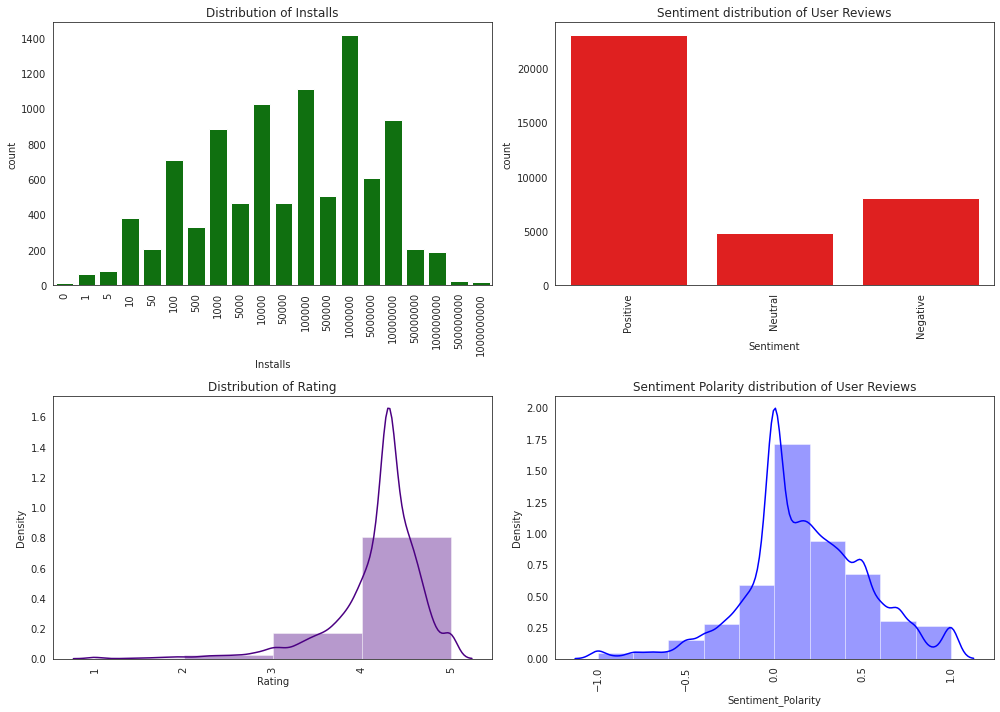

In [58]:
#Distribution plots of Performance Indicators
fig = plt.figure(figsize=(14,10))
c=1

plt.subplot(2,2,1)
sns.countplot(PS_df['Installs'],color='green')
plt.title('Distribution of Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(new_df_merged['Sentiment'],color='red')
plt.title('Sentiment distribution of User Reviews')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.distplot(PS_df['Rating'],bins=4,color='indigo')
plt.title('Distribution of Rating')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.distplot(new_df_merged['Sentiment_Polarity'],bins=10,color='blue')
plt.title('Sentiment Polarity distribution of User Reviews')
plt.xticks(rotation=90)
plt.tight_layout()


# **Correlation heatmap**

The correlation heatmap is a handy visualisation tool that allows us to see which numerical variables are correlated, to what extent they are correlated, and what sort of correlation they have (positive or negative). 


> So let's make use of this tool and try to figure out which features impact the app's ratings and installations


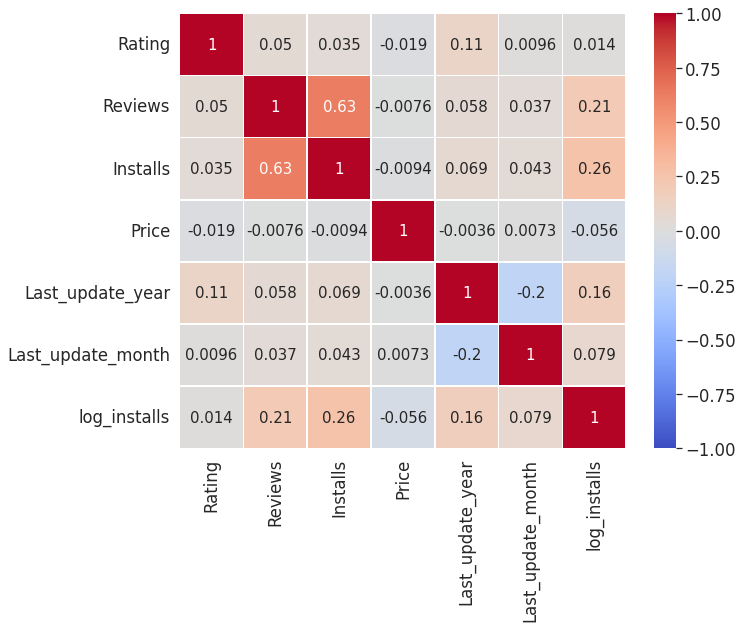

In [108]:
#Correlation heatmap of numerical features in Playstore dataset
plt.figure(figsize = (10,8))
sns.heatmap(PS_df.corr(),vmin=-1,linewidth=0.5,cmap='coolwarm',annot=True,annot_kws={'size': 15})
sns.set(font_scale = 1.5 )

> How are the other features in heatmap related to **Rating**?

*   None of the features in the heatmap have a major correlation with rating except for the year of last update
*   The ratings of the applications seems to be *positively correlated* with year of last update.
*   There is also a slight *positive correlation* between Rating and Installs.The better rated apps have more installs and vice versa.
*   Price is negatively correlated with Rating

> What about **Installs**?

*  There is a strong *positive correlation* between Reviews and Installs.It is obvious that more Reviews will begin to flood in as the number of instals grows.So,they may be termed co-dependent.
*    The last update year can also bee seen to be *positively correlated* with the installs.
*    Price is negatively correlated with Installs
 

> Price is *negatively correlated* with all the other features in the heatmap.

# **Type**

Apps which can be installed without having to pay money are termed as Free apps.The ones which requires a certain amount to be paid in order to install them are the Paid apps.     

*    What is the number of paid and free apps in Google Playstore?
*    Are people equally likely to install paid and free apps?
*    What is the Rating distribution of free and paid apps?



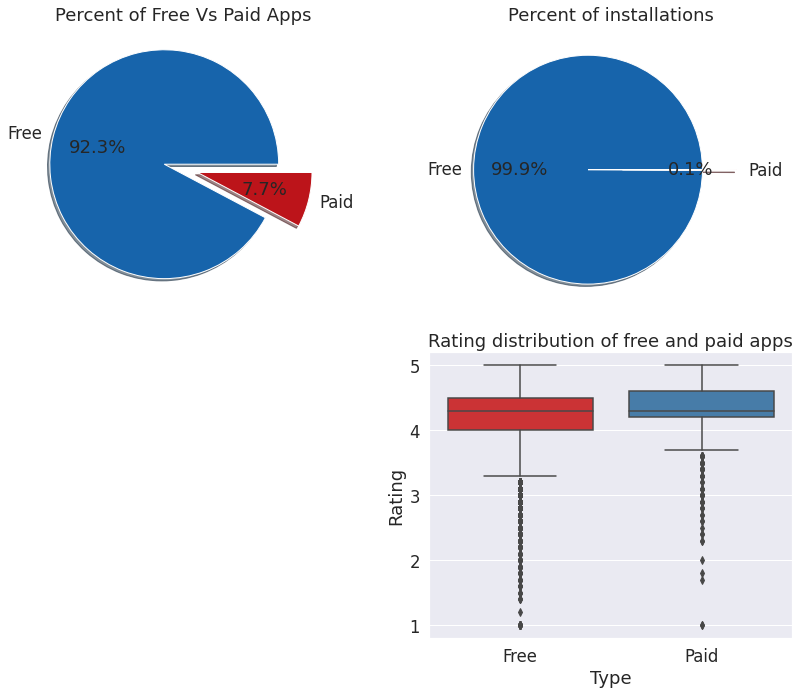

In [70]:


type_df=PS_df.groupby(['Type']).agg(no_of_apps=('App','count'),installs=('Installs',sum))
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
colors = [a(.8), b(.8),c(.8),d(.8)]

fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
explode = (0.2,0.1)
plt.pie(type_df['no_of_apps'], explode=explode, labels=type_df.index, colors=[a(.8), b(.8)], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps ')

plt.subplot(2,2,2)
explode = (0.2,0.1)
plt.pie(type_df['installs'],explode=explode, labels=type_df.index, colors=[a(.8), b(.8)], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of installations')

plt.subplot(2,2,4)
sns.boxplot(x='Type',y='Rating',data=PS_df,palette='Set1')
plt.title('Rating distribution of free and paid apps')
plt.tight_layout()


* It can be clearly seen that Free apps dominate the App market.
* Free apps garner the most number of installs
* Paid apps are slightly better rated than free apps



---


# **App Categories**
Grouping apps into multiple categories makes it very convenient for the users to find applications suitable for their requirement and makes the overall search experience hasslefree. From business point-of-view, this grouping feature in Google playstore has helped companies make their apps quickly and easily discoverable to the potential users.

*  What is the number of apps in each category?
*  What are the most popular categories on Playstore?

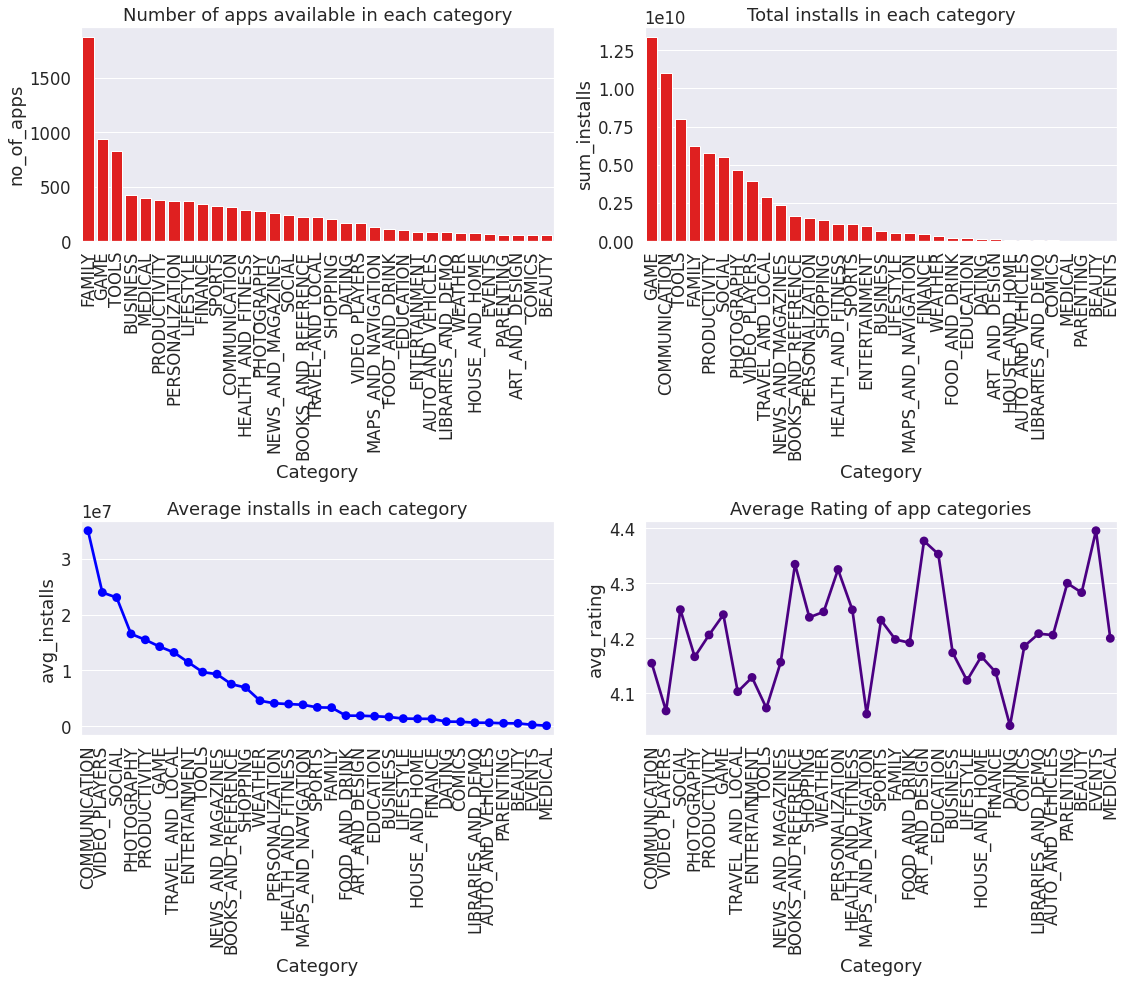

In [109]:
#Distribution plots of Performance Indicators
fig = plt.figure(figsize=(16,14))

category_df=PS_df.groupby(['Category']).agg(no_of_apps=('App','count'),sum_installs=('Installs',sum),avg_rating=('Rating','mean'),avg_installs=('Installs','mean'))
plt.subplot(2,2,1)
category_df.sort_values('no_of_apps',ascending=False,inplace=True)
sns.barplot(x=category_df.index,y=category_df['no_of_apps'],data=category_df,color='red')
plt.title('Number of apps available in each category')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
category_df.sort_values('sum_installs',ascending=False,inplace=True)
sns.barplot(x=category_df.index,y=category_df['sum_installs'],data=category_df,color='red')
plt.title('Total installs in each category')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
category_df.sort_values('avg_installs',ascending=False,inplace=True)
sns.pointplot(x=category_df.index,y=category_df['avg_installs'],data=category_df,color='blue')
plt.title('Average installs in each category')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.pointplot(x=category_df.index,y='avg_rating',data=category_df,color='indigo')
plt.title('Average Rating of app categories')
plt.xticks(rotation=90)

plt.tight_layout()

The Top 5 categories by most numbers of Apps are:

1.   Family
2.   Game
3.   Tools
4.   Medical
5.   Personalization

The categories like Beauty,Comics,Art and Design,Parenting and Events have least number of apps.

The categories with maximum installs are:

1.   Games
2.   Communication
3.   Tools 
4.   Family
5.   Productivity


# **Content Rating**

Content Rating indicates the maturity level of the content in the apps.Does content rating affect the popularity of the app?Let's find out.

* What are Content Ratings of apps available in Playstore?
* Does Content Rating affect the installs?

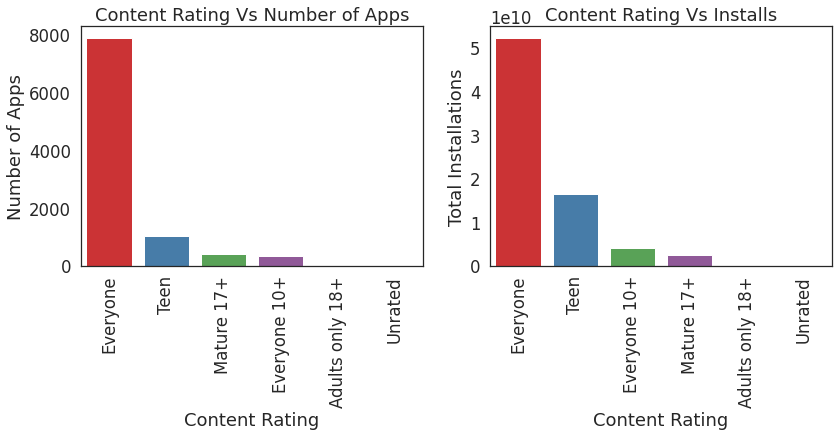

In [106]:

content_df=PS_df.groupby(['Content Rating']).agg(no_of_apps=('App','count'),installs=('Installs','sum'),avg_rating=('Rating','mean'))
fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
content_df.sort_values('no_of_apps',ascending=False,inplace=True)
sns.barplot(x=content_df.index,y=content_df['no_of_apps'],palette='Set1')
plt.xticks(rotation=90)
plt.title('Content Rating Vs Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Content Rating')

plt.subplot(2,2,2)
content_df.sort_values('installs',ascending=False,inplace=True)
sns.barplot(x=content_df.index,y=content_df['installs'],palette='Set1')
plt.xticks(rotation=90)
plt.title('Content Rating Vs Installs')
plt.ylabel('Total Installations')
plt.xlabel('Content Rating')

plt.tight_layout()

As seen in the above barplot,most of the apps in Google playstore caters to interest of audiences belonging to all age groups.It looks like,there are very few apps with content ratings 'Adults only 18+' and 'Unrated' and hence they're virtually invisible in the pie chart.

Apps targetting users belonging to all age groups has most number of installations.The higher number of installations indicate that Apps suitable for Everyone are most popular.The installations for Apps for teen audience is the second highest.Although there are lesser number of apps catering to teen audience as compared to those suitable for everyone,these apps have managed to grab people's attention.Similar as in the case of number of apps,Adults only 18+ and Unrated apps seems to have very few number of installs as compared to the apps with other content ratings.

# **Last update year and month**

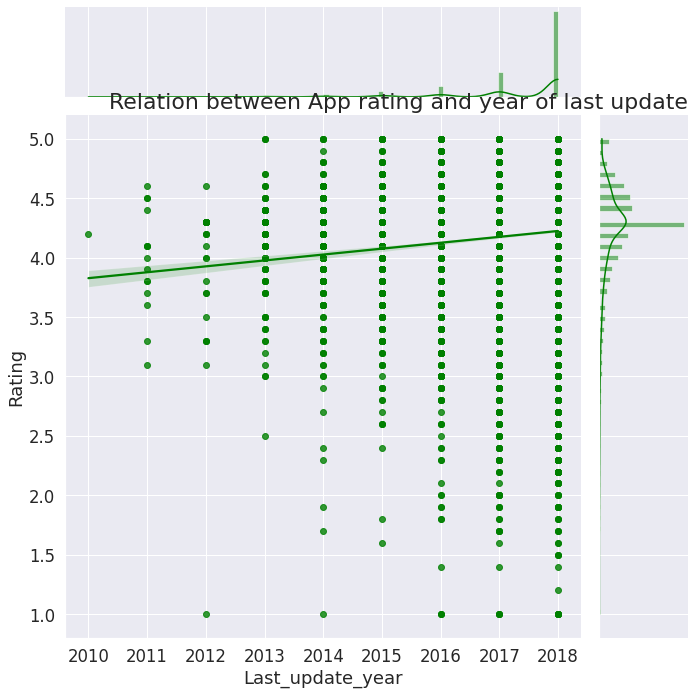

In [110]:
sns.jointplot(x='Last_update_year',y='Rating',data=PS_df,kind='reg',height=10,color='green')
plt.title('Relation between App rating and year of last update',size=22,loc='right')


From the above jointplot,we can conclude that Apps which has been updated recently have higher chances of receiving better ratings .
Apps that are updated often tend to receive better ratings. Because users are aware that the developers are striving to improve the app and are paying attention to their feedback.
The more dedicated you are to your product, the higher your rating will be.

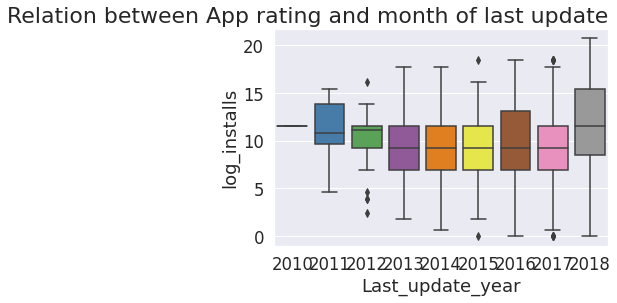

In [123]:
sns.boxplot(x='Last_update_year',y='log_installs',data=PS_df,palette='Set1')
plt.title('Relation between App rating and month of last update',size=22,loc='right')
